<a href="https://colab.research.google.com/github/Evanskonto/MA336-Artificial-intelligence-and-machine-learning-with-applications/blob/main/LAB%203%3A%20Decision%20Trees%20and%20Random%20Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests: The Titanic Disaster

On 10th April 1912 RMS Titanic began her maiden voyage across the Atlantic Ocean from Southampton in England to New York City. Just four days into the crossing and 375 miles South of Newfoundland the ship hit an iceberg that tore into its hull. Less than 3 hours later the titanic broke apart and sank. Tragically, the number of lifeboats on deck was insufficient to carry all the passengers on board and over half drowned as the ship sank below the icy surface. A disproportionate number of men were left aboard  because of the "women and children first" policy for loading lifeboats. But there may be other passenger features that can also be attributed to the chances of survival.

Our task today is to create a machine learning model that will accurately predict who did and who didn't survive the Titanic disaster. We will use the dataset [here](https://moodle.essex.ac.uk/course/view.php?id=15076&section=10). Please download train.csv to your computer. The dataset is taken from the [Kaggle "Titanic - Machine Learning from Disaster"](https://www.kaggle.com/c/titanic/overview) competition. If you choose to download the data from the Kaggle website then please download the [train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv) file. We will use the training data to both train and test our algorithms. The test.csv file provided on the website is used to enter the competition (which you are welcome to do!)

We will begin by implementing a Decision Trees algorithm and then see if this can be improved using a Random Forest.

But first, let's take a look at our data and perform an exploratory data analysis.

## Load the Titanic dataset

In [2]:
import pandas as pd
import numpy as np
# Load the training dataset used in the Kaggle "Titanic - Machine Learning from Disaster" competition.
# This dataset will be used here both for training and testing our algorithms.

# The test set on the Kaggle site is used to enter the competition - have a go!
titanic = pd.read_csv("titanic_dataset.csv")

# Loading the csv file from Github (might take some time depending on internet connection)
#url = 'https://raw.githubusercontent.com/mariogutierrezroig/Teaching-Notebooks/main/Decision_Trees/titanic_dataset.csv'
#df = pd.read_csv(url)

# Print out information about the titanic dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 observations (i.e. passengers), 11 features and the target variable *Survived*.

Let's calculate the probability of surviving without using any feature information:

In [3]:
survive_prob = sum(titanic.Survived) / len(titanic)
print('Probability of surviving is:', np.round(survive_prob,2))

Probability of surviving is: 0.38


Thus we could label every passenger *Died* and achieve an accuracy of:

In [4]:
print(round(1-survive_prob,2))

0.62


This is the accuracy we need to beat!
Discuss class imbalance. (mild 20-40%, moderate 1-20%, extreme <1%)

In [5]:
# Look at the first 10 rows of the dataframe
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The dataframe is displayed in a tidy format with observations in rows and with features and the target variable in columns. The features are as follows:

*Passengerid*: Passenger ID

*Survived*: Survival (0 = 'Died', 1 = 'Survived')

*Pclass*: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

*Name*: Passenger name, including title.

*Sex*: Gender ('male' or 'female')

*Age*: Passenger age in years

*SibSp*: Number of siblings/spouse on board

*Parch*: Number of parents/children on board

*Ticket*: Ticket number

*Fare*: Passenger ticket fare

*Cabin*: Cabin numbers (NaN if no cabin; letter denotes the deck)

*Embarked*: Embarkation port ('S' = Southampton, 'C' = Cherbourg, 'Q' = Queenstown)

We assume that the variable *Passengerid* is randomly assigned and contains no information about whether or not a passenger survived. Similarly for *Ticket*.

The attribute *Pclass* is an indicator of socio-economic status and is likely to be correlated with *Fare*. Other passenger features may also be correlated with each other.

We can print out the information given above from the dataframe using, for example, the following commands:

In [6]:
# "Embarked" categories
print('Embarked categories are:', titanic.Embarked.unique())
# "Pclass" categories
print('Pclass categories are:', titanic.Pclass.unique())

Embarked categories are: ['S' 'C' 'Q' nan]
Pclass categories are: [3 1 2]


## Exploratory Data Analysis (EDA)

It is useful before building any machine learning model to perform an EDA on the dataset. This enables us to get to know the data, remove any irrelevant or redundant features and see where ["Feature Engineering"](https://en.wikipedia.org/wiki/Feature_engineering) may be helpful.

(Notes:
Feature extraction, PCA etc.
Feature crosses - sythetic features - show example of feature cross from Google Developers on a zoom whiteboard)


Let's start by seeing if the "women and child first" policy is apparent in the data.

We can plot the number of male and female passengers on board using a bar chart, splitting by 'Survived' and 'Died':

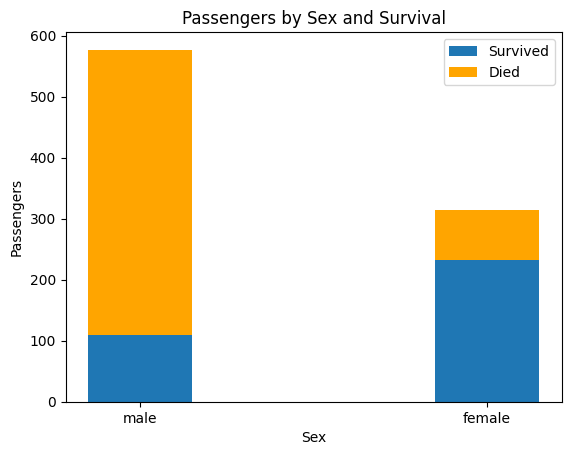

In [7]:
import matplotlib.pyplot as plt
# Plot a bar chart showing the number who survived and died by gender
labels_Sex = ['male', 'female']
# Survived by gender
male_survived = sum(titanic.loc[titanic['Sex']=='male'].Survived) # Sum 'Survived' variable for rows where 'Sex'='male'
female_survived = sum(titanic.loc[titanic['Sex']=='female'].Survived) # Sum 'Survived' variable for rows where 'Sex'='female'
Sex_survived = [male_survived, female_survived]
# Died by gender
total_males = len(titanic.loc[titanic['Sex']=='male'].Survived) # Number of males on board (try changing 'Survived' to a different variable - this should work too!)
total_females = len(titanic.loc[titanic['Sex']=='female'].Survived) # Number of females on board
male_died = total_males - male_survived
female_died = total_females - female_survived
Sex_died = [male_died, female_died]

# Make the plot
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Sex, Sex_survived, width, label='Survived',color='tab:blue')
ax.bar(labels_Sex, Sex_died, width, bottom=Sex_survived,label='Died',color='orange')
ax.set_xlabel('Sex')
ax.set_ylabel('Passengers')
ax.set_title('Passengers by Sex and Survival')
ax.legend()
plt.show()

We can see that there were many more male than female passengers on board the Titanic and that the proportion of women who survived was far greater than for men. We can calculate the percentages:

In [8]:
# Print out the number of male (female) passengers who survived as a percentage of the total nummber of
# males (females) on board
print('Proportion of male passengers who survived:',round(male_survived*100/(male_survived+male_died),1),'%')
print('Proportion of female passengers who survived:',round(female_survived*100/(female_survived+female_died),1),'%')

Proportion of male passengers who survived: 18.9 %
Proportion of female passengers who survived: 74.2 %


Now we can look at the effect of age by plotting histograms of the age distributions for the two target classes 'Survived' and 'Died':

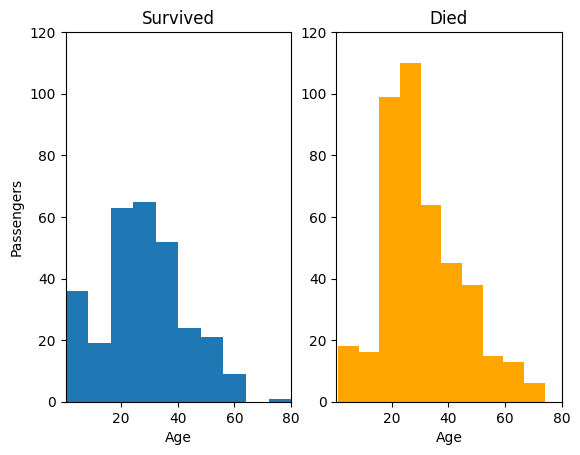

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(titanic.loc[titanic['Survived']==1].Age,color='tab:blue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Passengers')
ax1.set_title('Survived')
ax2.hist(titanic.loc[titanic['Survived']==0].Age,color='orange')
ax2.set_xlabel('Age')
ax2.set_title('Died')
# Set the axis limits to be the same for both both plots
xlimits = [min(titanic.Age), max(titanic.Age)]
ylimits = [0, 120]
ax1.set_xlim(xlimits)
ax1.set_ylim(ylimits)
ax2.set_xlim(xlimits)
ax2.set_ylim(ylimits)
plt.show()

To see the effect of age more clearly we can plot the histograms overlaid on each other:

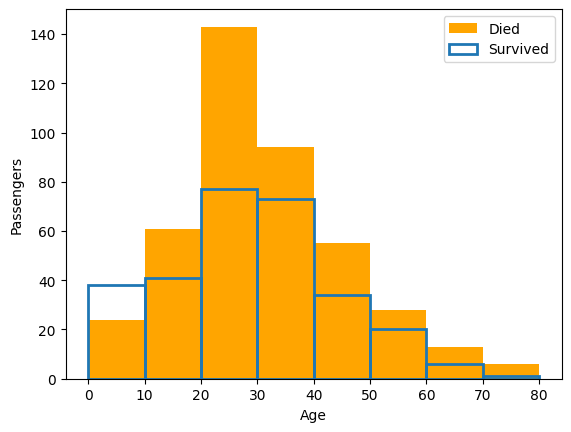

In [10]:
# Use the same bins for both plots
bins_age = [0,10,20,30,40,50,60,70,80]

fig, ax = plt.subplots(1, 1)
ax.hist(titanic.loc[titanic['Survived']==0].Age,bins=bins_age,color='orange',label='Died')
ax.hist(titanic.loc[titanic['Survived']==1].Age,bins=bins_age,facecolor='none',edgecolor='tab:blue',linewidth=2,label='Survived')
ax.set_xlabel('Age')
ax.set_ylabel('Passengers')
ax.legend()
plt.show()

The plot above shows that the 0-10 years age group is the only group for which more passengers survived than died, consistent with the "women and child first" policy. Passengers in the 20-30 years age group had the lowest chance of survival.

<div class="alert alert-block alert-info"><b>Exercise 1:</b><br>
    
It is rumoured that passengers in third class were kept behind locked gates below deck and prevented from boarding lifeboats. Although this conjecture is generally considered to be false, it seems likely there was some direct effect of socio-economic status on the chances of survival. Plot bar charts depicting how *Pclass* and *Embarked* (categorical variables) relate to survival, as was done for gender.

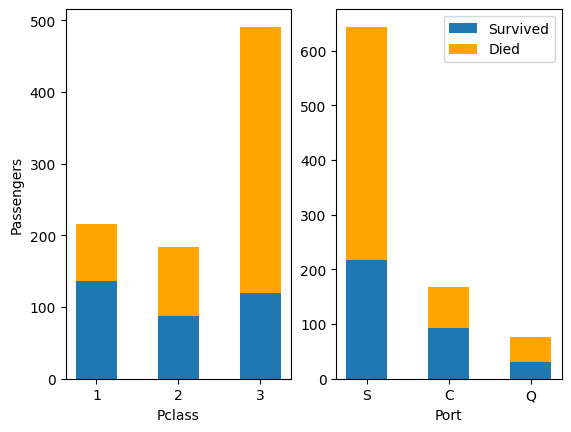

In [11]:
### Exercise 1: Solution ###


# Passengers by Pclass and Survival
labels_Pclass = ['1', '2', '3']
Pclass1_survived = sum(titanic.loc[titanic['Pclass']==1].Survived)
Pclass2_survived = sum(titanic.loc[titanic['Pclass']==2].Survived)
Pclass3_survived = sum(titanic.loc[titanic['Pclass']==3].Survived)
Pclass_survived = [Pclass1_survived, Pclass2_survived, Pclass3_survived]
Pclass1_died = len(titanic.loc[titanic['Pclass']==1].Survived)-Pclass1_survived
Pclass2_died = len(titanic.loc[titanic['Pclass']==2].Survived)-Pclass2_survived
Pclass3_died = len(titanic.loc[titanic['Pclass']==3].Survived)-Pclass3_survived
Pclass_died = [Pclass1_died, Pclass2_died, Pclass3_died]

# Passengers by Embarked and Survivial
labels_Port = ['S', 'C', 'Q']
PortS_survived = sum(titanic.loc[titanic['Embarked']=='S'].Survived)
PortC_survived = sum(titanic.loc[titanic['Embarked']=='C'].Survived)
PortQ_survived = sum(titanic.loc[titanic['Embarked']=='Q'].Survived)
Port_survived = [PortS_survived, PortC_survived, PortQ_survived]
PortS_died = len(titanic.loc[titanic['Embarked']=='S'].Survived)-PortS_survived
PortC_died = len(titanic.loc[titanic['Embarked']=='C'].Survived)-PortC_survived
PortQ_died = len(titanic.loc[titanic['Embarked']=='Q'].Survived)-PortQ_survived
Port_died = [PortS_died, PortC_died, PortQ_died]

# Make the plots
fig, (ax1, ax2) = plt.subplots(1,2)
width = 0.5

# Pclass
ax1.bar(labels_Pclass, Pclass_survived, width, label='Survived',color='tab:blue')
ax1.bar(labels_Pclass, Pclass_died, width, bottom=Pclass_survived,label='Died',color='orange')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Passengers')

# Embarked
ax2.bar(labels_Port, Port_survived, width,label='Survived',color='tab:blue')
ax2.bar(labels_Port, Port_died, width, bottom=Port_survived,label='Died',color='orange')
ax2.set_xlabel('Port')
ax2.legend()
plt.show()


In [12]:
print('Survival rate in 1st class:',round(Pclass1_survived*100/(Pclass1_survived+Pclass1_died),1),'%')
print('Survival rate in 2nd class:',round(Pclass2_survived*100/(Pclass2_survived+Pclass2_died),1),'%')
print('Survival rate in 3rd class:',round(Pclass3_survived*100/(Pclass3_survived+Pclass3_died),1),'%')

Survival rate in 1st class: 63.0 %
Survival rate in 2nd class: 47.3 %
Survival rate in 3rd class: 24.2 %


<div class="alert alert-block alert-info"><b>Exercise 2:</b><br>
    
Show the correlation between *Fare* (a continuous variable) and *Survival* using a histogram plot similar to the one used for *Age*.

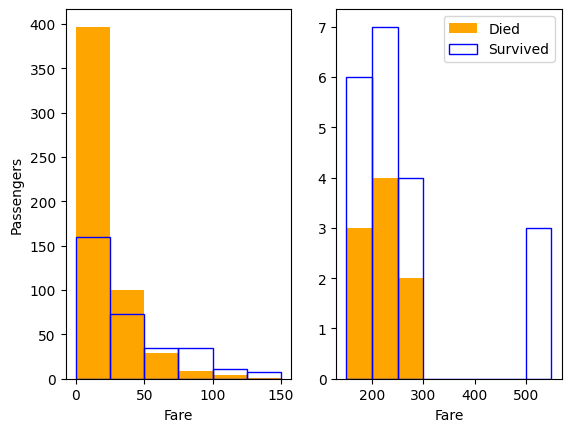

In [13]:
### Exercise 2: Solution ###


# Passengers by Fare and Survival
fig, (ax1, ax2) = plt.subplots(1, 2)

# Split into lower and higher fare groups to make the plots clearer
bins_fare_lower = [0,25,50,75,100,125,150]
bins_fare_higher = [150,200,250,300,350,400,450,500,550]

# Lower fares
ax1.hist(titanic.loc[titanic['Survived']==0].Fare,color='orange',bins=bins_fare_lower)
ax1.hist(titanic.loc[titanic['Survived']==1].Fare,facecolor='none',edgecolor='blue',bins=bins_fare_lower)
ax1.set_xlabel('Fare')
ax1.set_ylabel('Passengers')

# Higher fares
ax2.hist(titanic.loc[titanic['Survived']==0].Fare,color='orange',bins=bins_fare_higher,label='Died')
ax2.hist(titanic.loc[titanic['Survived']==1].Fare,facecolor='none',edgecolor='blue',bins=bins_fare_higher,label='Survived')
ax2.set_xlabel('Fare')
ax2.legend()

plt.show()


In [14]:
counts_died, edges = np.histogram(titanic.loc[titanic['Survived']==0].Fare,bins=bins_fare_lower)
counts_survived, edges = np.histogram(titanic.loc[titanic['Survived']==1].Fare,bins=bins_fare_lower)
print('Proportion of passengers who survived in the "lower" fare bins:', np.round((counts_survived*100/(counts_survived+counts_died)),1),'%')

Proportion of passengers who survived in the "lower" fare bins: [28.7 42.2 54.7 79.5 73.3 88.9] %


Lastly, let's have a look at the effect of travelling with family members on survival. Were passengers more likely to survive if they had parents or children on board? Did more passengers survive if they were travelling with a spouse or siblings?

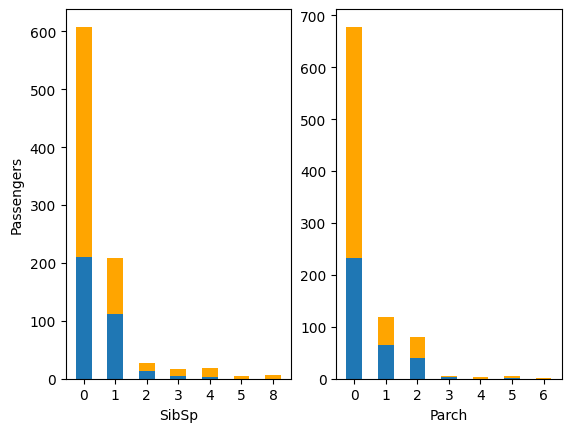

In [15]:
# Look at Parch and SibSp
#print(titanic.SibSp.value_counts())
#print(titanic.Parch.value_counts())

# SibSp
unique_SibSp = sorted(titanic.SibSp.unique()) # Sorts into ascending order
#print(unique_SibSp)
SibSp_survived = [] # List for number who survived for each Sibsp
SibSp_died = [] # List for number who died for each Sibsp
for SibSp in unique_SibSp:
    tmp_survived = sum(titanic.loc[titanic['SibSp']==SibSp].Survived) # Write over number who survived
    SibSp_survived.append(tmp_survived)
    tmp_died = len(titanic.loc[titanic['SibSp']==SibSp].Survived)- tmp_survived
    SibSp_died.append(tmp_died)
labels_SibSp = [str(x) for x in unique_SibSp] # Convert each value in SibSp to a string for plot labels

# Parch
unique_Parch = sorted(titanic.Parch.unique())
Parch_survived = [] # List for number who survived for each Parch
Parch_died = [] # List for number who died for each Parch
for Parch in unique_Parch:
    tmp_survived = sum(titanic.loc[titanic['Parch']==Parch].Survived) # Write over number who survived
    Parch_survived.append(tmp_survived)
    tmp_died = len(titanic.loc[titanic['Parch']==Parch].Survived)- tmp_survived
    Parch_died.append(tmp_died)
labels_Parch = [str(x) for x in unique_Parch]

# Make the plots
fig, (ax1, ax2) = plt.subplots(1,2)
width = 0.5

# SibSp
ax1.bar(labels_SibSp, SibSp_survived, width, label='Survived',color='tab:blue')
ax1.bar(labels_SibSp, SibSp_died, width, bottom=SibSp_survived,label='Died',color='orange')
ax1.set_xlabel('SibSp')
ax1.set_ylabel('Passengers')

# Parch
ax2.bar(labels_Parch, Parch_survived, width, label='Survived',color='tab:blue')
ax2.bar(labels_Parch, Parch_died, width, bottom=Parch_survived,label='Died',color='orange')
ax2.set_xlabel('Parch')


plt.show()

The chances of survival were less for passengers travelling without any siblings/spouse or without children/parents. How does the picture look if we add these variables together to make an engineered feature *Family*?

In [16]:
Family = titanic.Parch + titanic.SibSp
titanic['Family'] = Family
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


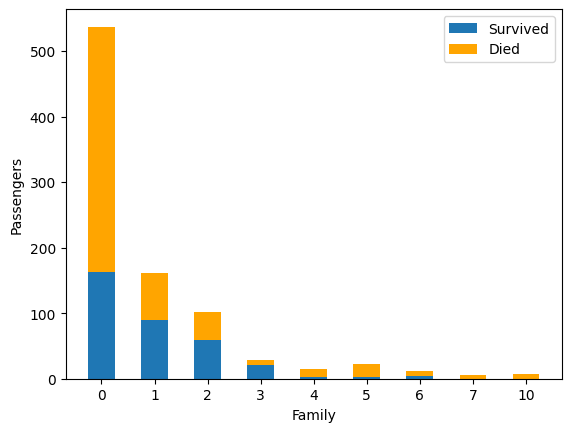

In [17]:
# Make a plot by survival for "Family"
unique_Family = sorted(titanic.Family.unique())
Family_survived = [] # List for number who survived for each Family size
Family_died = [] # List for number who died for each Family size
for Family in unique_Family:
    tmp_survived = sum(titanic.loc[titanic['Family']==Family].Survived) # Write over number who survived
    Family_survived.append(tmp_survived)
    tmp_died = len(titanic.loc[titanic['Family']==Family].Survived)- tmp_survived
    Family_died.append(tmp_died)
labels_Family = [str(x) for x in unique_Family]

# Make the plot
fig, ax = plt.subplots(1,1)
width = 0.5

ax.bar(labels_Family, Family_survived, width, label='Survived',color='tab:blue')
ax.bar(labels_Family, Family_died, width, bottom=Family_survived,label='Died',color='orange')
ax.set_xlabel('Family')
ax.set_ylabel('Passengers')
ax.legend()
plt.show()

We can see that passengers travelling alone were far more likely to die than to survive. Passenegers travelling with 1-3 other family members had a better than even chance of survival, but belonging to a family with 4 or more members appeared to be detrimental.

How about *Name*? This variable may be useful for various reasons. If a passenger has a title other than "Mr" or "Mrs" then this may indicate class or profession and could be a predictor of survival. *Name* may also be useful to fill in missing data. For example, the name may indicate gender or port of embarkation, and the title will give a clue to age (e.g. a female with title "Miss" is likely to be younger than a passenger with title "Mrs"). For simplicity we will omit *Name* in this model, but check [here](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) to see an example of using the engineered feature *Title*.

For now, we will perform a simple feature selection using the results from our EDA. Let's remove *PassengerID*, *Ticket* and *Name* and replace *Parch* and *SibSp* with the engineered feature *Family*. (Note that it may be that *Parch* and *SibSp* contain useful information beyond that provided by *Family*. I will leave you to look into this further.)

In [18]:
titanic = titanic.drop(['PassengerId','Name','Ticket','SibSp','Parch'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


## Cleaning the data

Before running our data through our machine learning algorithm we must clean it: we need to decide what to do with missing data (i.e. NaNs) and convert categorical variables to numbers.

Let's start by looking at where we have NaNs in the dataframe:

In [19]:
import pandas as pd
# Go through each input feature checking if there are any (and how many) NaNs
Features = titanic.columns.tolist() # Make a list of the feature names
print(Features)
for feature in Features:
    num = 0
    for i in range(0,len(titanic)):
        if pd.isnull(titanic.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)

['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family']
NaNs for Survived is 0
NaNs for Pclass is 0
NaNs for Sex is 0
NaNs for Age is 177
NaNs for Fare is 0
NaNs for Cabin is 687
NaNs for Embarked is 2
NaNs for Family is 0


*Age*, *Cabin* and *Embarked* all contain entries with NaNs.

*Cabin* is the most straight-forward to deal with, so we'll do that first. Print out all unique *Cabin* entries:

In [20]:
print('Cabins are:', titanic.Cabin.unique())

Cabins are: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


Let's assign a '1' to those passengers with a cabin and '0' to those without a cabin (i.e. all those with NaN entries). I will leave it to you to investigate whether or not the deck location of the cabin is a useful predictor of survival - look [here](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) to see how to strip the numbers from the cabin name.

In [21]:
# Loop over passengers and assign '0' for no cabin and '1' for cabin
import math
Cabin_binary = []
for cabin in titanic.Cabin:
    if str(cabin) == 'nan': # Convert cabin to str and check if nan
        Cabin_binary.append(0)
    else:
        Cabin_binary.append(1)
print('Number of passengers with a cabin:',sum(Cabin_binary))

Number of passengers with a cabin: 204


Replace *Cabin* with *Cabin_binary* in the dataframe.

In [22]:
# Replace 'Cabin' with Cabin_binary (but still named 'Cabin')
titanic['Cabin'] = Cabin_binary
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,0,S,1
1,1,1,female,38.0,71.2833,1,C,1
2,1,3,female,26.0,7.9250,0,S,0
3,1,1,female,35.0,53.1000,1,S,1
4,0,3,male,35.0,8.0500,0,S,0


There are various ways to proceed in order to deal with missing data for *Age* and *Embarked*. Bear in mind that if you are planning to enter the Kaggle 'Titanic - Machine Learning from Disaster' competition then you will need a method for dealing with NaNs in the Kaggle test.csv file [here](https://www.kaggle.com/c/titanic/data?select=test.csv) used to submit results.

For example, we could:

1. Remove all rows containing missing data to train our model and for each passenger in the test set with an NaN entry simply assign *Survive* according to the probability of survival from the training set.
2. Replace each NaN entry in the dataframe with the mean for that feature (for continuous varibles) or the mode (for categorical variables).
3. Replace each NaN using a more sophisticated method that takes into account clues from the other variables (e.g. different distibutions of *Age* for men and women, *Name* may indicate age group etc).

For now we will proceed with route (2). However, note that this method may bias our predictions and it is worth trying other ways to better deal with missing data.

In [23]:
# Replace NaNs in "Age" with the mean value over all passengers (improve on this later!)
import numpy as np
mean_age = titanic.Age.mean()
print('Mean age over all passengers is:', np.round(mean_age,2), 'years')
#titanic = titanic
titanic['Age'] = titanic['Age'].fillna(mean_age)

Mean age over all passengers is: 29.7 years


Replace NaNs in *Embarked* by the mode, 'S'. (Perhaps we could inprove on this later by using the information in *Name* to indicate nationality?)

In [24]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,0,S,1
1,1,1,female,38.0,71.2833,1,C,1
2,1,3,female,26.0,7.9250,0,S,0
3,1,1,female,35.0,53.1000,1,S,1
4,0,3,male,35.0,8.0500,0,S,0


Finally, we need to convert categorical data to numerical. The categorical features have Dtype "object".

*Sex* is given as male or female, so lets change this to 0 (male) and 1 (female). *Embarked* will be given outputs 0, 1 and 2 for 'S', 'C' and 'Q', respectively.

In [25]:
# Convert object types to numerical
if titanic.Sex[0] == 'male' or titanic.Sex[0] == 'female':
    titanic['Sex']=titanic['Sex'].map({'male' : 0, 'female' : 1})
    titanic['Embarked']=titanic['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,1,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,1,0,1
4,0,3,0,35.0,8.0500,0,0,0


The cleaned dataframe contains 7 features and 891 observations.

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Decision Tree Classifier

In [27]:
# Now run the ML decision tree algorithm

# Begin by separating into training and test datasets so we can test our algorithm's performance
from sklearn.model_selection import train_test_split
X=titanic.drop(['Survived'],axis=1) # Input variables
X_names = Features[1:] # Remove 'Survived' from feature names
y=titanic['Survived'] # Target variable
y_names=['Died','Survived'] # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) # Choose tree depth
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_test, y_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
# items() method returns (key,value) tuple
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)

# Run the above code with different random_state seeds and max_depth values to see the effect on feature importance.

Accuracy on test set: 0.81
Features in order of importance:
Sex
Pclass
Cabin
Age
Fare
Embarked
Family


## Visualise the Decision Tree

Visualise the model using the plot_tree function (note that it will be difficult to see if you have used max_depth > 3).

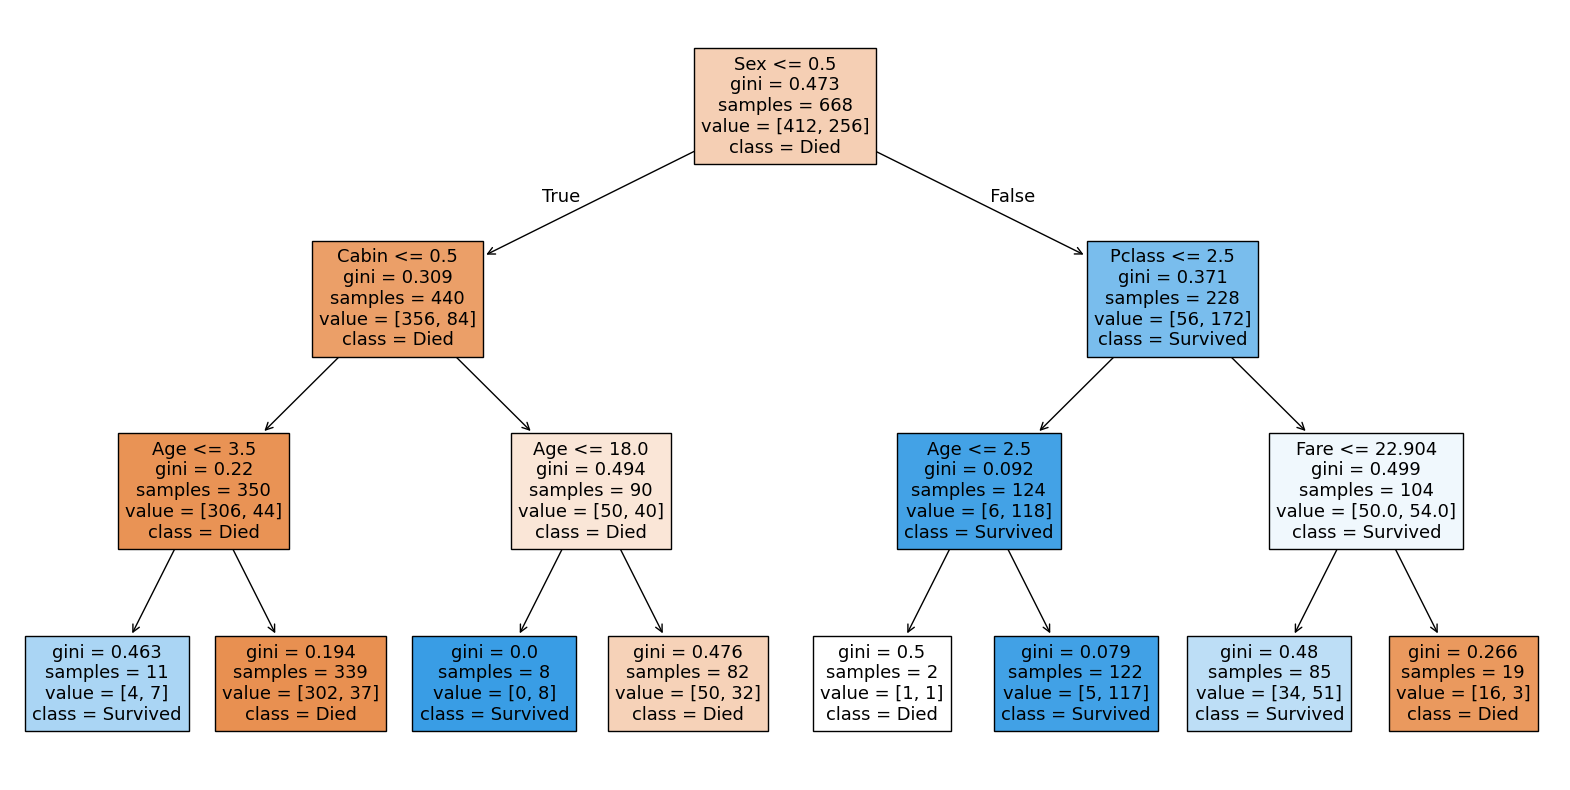

In [28]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True) # _ stops annotations print-out

Look at the nodes and try to understand what is written in each one. At the top of each node is the decision rule used for the split into the two child nodes e.g. in the root node the data is divided by *Sex* with male passengers (*Sex* = 0 <= 0.5) put in the left-hand child node and female passengers in the right-hand child node. The 'gini' value is the Gini Impurity for that node (see these [lecture slides](https://moodle.essex.ac.uk/pluginfile.php/1771417/mod_resource/content/1/MA336_ML_Lectures2and3.pdf) for a description of the Gini Impurity). The higher the Gini Impurity, the greater the mixing between classes. The 'samples' value is the total number of observations in that node (which for the root node is all of the training data - check this is correct using the command len(X_train)). The 'value' list is the number of samples in each class, in this case ['Died', 'Survived']. The class of the node is assigned according to which class has the greater number of samples. This is helpful to see how the classifier would perform if the tree was terminated at that depth. The leaf nodes give the final classification of each sample.

We can calculate the model performance using an accuracy metric by adding up all the correct classifications from the leaf nodes and dividing by the total number of samples. Check you get the same accuracy as output by the accuracy_score() function from sklearn.

<div class="alert alert-block alert-info"><b>Exercise 3:</b><br>
    
Now that you know how to train a Decision Tree with a specific max_depth it's time to explore what happens when you change this hyperparamter. Create a loop that iterates over different values of max_depth and train each time a decision tree. Then, plot in a line chart the accuracy as a function of the max_depth parameter for both the train set and test set. What happens as you increase the value of the hyperparameter max_depth?

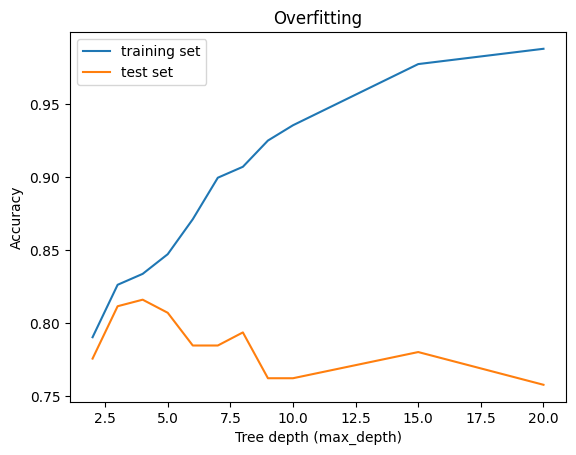

In [29]:
### Exercise 3: Solution ###


# Plot accuracy as a function of max_depth
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

## Accuracy using k-fold cross-validation

In [30]:
# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 4
from sklearn.model_selection import cross_val_score
maxDepth = 4
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.75977654 0.82022472 0.80898876 0.78651685 0.85393258]
Average performance for a tree depth of 4 is: 80.6 +/- 3.5 %


<div class="alert alert-block alert-info"><b>Exercise 4:</b><br>
    
Select a k-fold value and recreate a similar line chart than in previous exercise, accuracy vs max_depth for the test accuracy, but this time use the average values of the cross-validation scores and its error. You can also try with different values of k and see if there any difference.

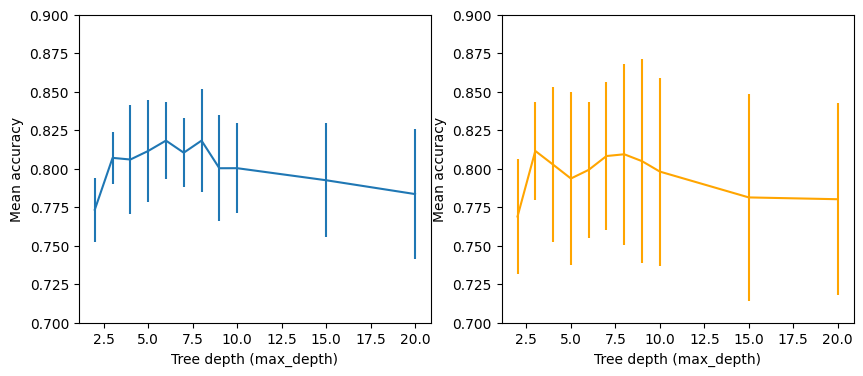

In [32]:
### Exercise 4: Solution ###


# Plotting mean accuracy (found using the sklearn cross_val_score() class) as a function of max_depth.
from sklearn.model_selection import cross_val_score
import math

max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]

### 5-fold ###
k=5
mean_accuracy_cv_k5 = [] # mean accuracy over the k folds for each tree depth
sd_cv_k5 = [] # standard deviation of accuracy scores over the k folds for each tree depth

for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k5.append(avg)
    sd_cv_k5.append(sd)

### 10-fold ###
k=10
mean_accuracy_cv_k10 = [] # mean accuracy over the k folds for each tree depth
sd_cv_k10 = [] # standard deviation of accuracy scores over the k folds for each tree depth

for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k10.append(avg)
    sd_cv_k10.append(sd)

# Make the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].errorbar(max_depth_vals,mean_accuracy_cv_k5,yerr=sd_cv_k5)
ax[0].set_xlabel("Tree depth (max_depth)")
ax[0].set_ylabel("Mean accuracy")
ax[0].set_ylim([0.70,0.9])

ax[1].errorbar(max_depth_vals,mean_accuracy_cv_k10,yerr=sd_cv_k10, color="orange")
ax[1].set_xlabel("Tree depth (max_depth)")
ax[1].set_ylabel("Mean accuracy")
ax[1].set_ylim([0.70,0.9])

plt.show()

## Feature Importances

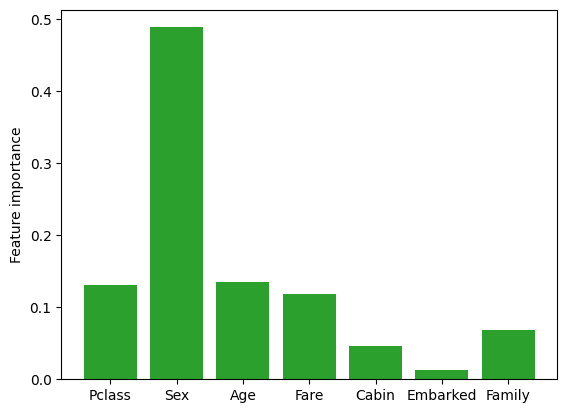

In [33]:
# Plot a histogram of feature importances using a fixed tree depth

def get_feature_importances(X,y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25,
                                                                        random_state=randomState, stratify=y)
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_train,y_train)
    return decision_tree.feature_importances_

maxDepth = 6

# Get feature importances for different train/test splits (by changing random_state in train_test_split()) and compute the average importance for each feature.
import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,y,randomState,maxDepth)
    # Commented out the below 2 lines and replaced with 1 (better to use less lines of code!)
    #tmp = zip(feature_importances_summed,feature_importances)
    #feature_importances_summed = [(x + y) for (x, y) in tmp]
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_names, feature_importances_mean,color='tab:green')
ax.set_ylabel('Feature importance')
plt.show()

## Random Forest Classifier

Individual decision trees are prone to overfitting, especically if they are grown too deep. Random Forests allow trees to be grown deeper as they rely on "majority vote" and so are less exposed to the peculiarities of the training set. Below we run a Random Forest classifier.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_features='sqrt',  # use 'sqrt' instead of 'auto'
    criterion='gini',
    max_depth=None,
    random_state=3,
    oob_score=True
)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
print("Accuracy on training set:", round(metrics.accuracy_score(y_train, y_train_pred), 2))

y_test_pred = forest.predict(X_test)
print("Accuracy on test set:", round(metrics.accuracy_score(y_test, y_test_pred), 2))

print("OOB score:", round(forest.oob_score_, 2))

Accuracy on training set: 0.99
Accuracy on test set: 0.83
OOB score: 0.8


[Out-of-bag error](https://en.wikipedia.org/wiki/Out-of-bag_error) can be computed when bootstrap aggregating (bagging) it is used. This adds an extra layer of validation as described in the [documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

<div class="alert alert-block alert-info"><b>Exercise 5:</b><br>
    
Plot the mean performance of the Random Forest algorithm as a function of tree depth using different numbers of trees. Show that each individual tree can be grown deeper when an ensemble method is used and a greater accuracy achieved overall. Also show on the plot the results from cross-validation using a single decision tree for comparison. (Note that you should not set n_estimators=1 in the Random Forest algorithm to represent a single decision tree unless max_features is set equal to the total number of features in the dataframe and bootStrap=False).

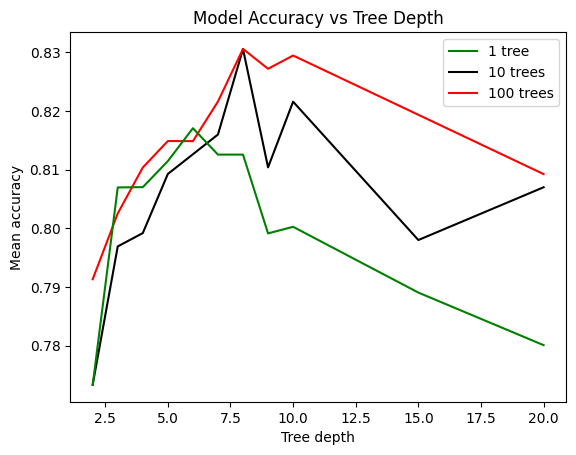

In [38]:
## Exercise 5


rom sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

max_depth_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
n_estimators_vals = [10, 100]
mean_accuracy_store = []
sd_accuracy_store = []
k = 5

for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest = RandomForestClassifier(
            n_estimators=value,
            bootstrap=True,
            max_features="sqrt",  # ← FIXED
            criterion='gini',
            max_depth=val,
            random_state=i,
            oob_score=False
        )
        cv_scores = cross_val_score(forest, X, y, cv=k)
        avg = sum(cv_scores) / len(cv_scores)
        sd = math.sqrt(sum((cv_scores - avg) ** 2) / (len(cv_scores) - 1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

# Plotting
fig = plt.figure()
ax = plt.axes()
line2, = ax.plot(max_depth_vals, mean_accuracy_store[0], color='black', label='10 trees')
line3, = ax.plot(max_depth_vals, mean_accuracy_store[1], color='red', label='100 trees')

# Single decision tree comparison
mean_accuracy_cv = []
for i in range(len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=3)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores) / len(cv_scores)
    mean_accuracy_cv.append(avg)

line1, = ax.plot(max_depth_vals, mean_accuracy_cv, color='green', label='1 tree')

plt.legend(handles=[line1, line2, line3])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.title("Model Accuracy vs Tree Depth")
plt.show()

---
<div style="text-align: right ;font-size: small; color: gray"> Notebook by <a href="http://mariogutierrezroig.net">Mario Gutiérrez-Roig</a> and <a href="https://www.essex.ac.uk/people/voigt40704/lisa-voigt">Lisa Voigt</a>, Lecturers in Data Science and Statistics at the University of Essex <a href="http://creativecommons.org/licenses/by-sa/4.0/" rel="license"><img src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" alt="Licencia de Creative Commons" hspace="10" align="right"></a></div>